In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/financial-news-market-events-dataset-2025/financial_news_events.csv
/kaggle/input/financial-news-market-events-dataset-2025/financial_news_events.json
/kaggle/input/financial-news-market-events-dataset-2025/financial_news_events.xlsx
/kaggle/input/nrc-emoticon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt


# Data Parsing 
using urllib.request and beautifulsoup

In [2]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
# % python3 -m pip install bs4

#the url is https://finviz.com/quote.ashx?t=AMZN * * *  ,  t = [ticker]
#we only need https://finviz.com/quote.ashx?t=  and we can add the ticker to the url

finviz_url = "https://finviz.com/quote.ashx?t="
tickers = ['NVDA', 'MSFT','AMZN'	,'META','GOOGL', 'TSLA']


#iterate over tickers and create finziv url to parse

for ticker in tickers:
    url = finviz_url + ticker
    
    #now request data from the url

    req = Request(url = url, headers = {"user-agent":"app"})  #if user agent not specified, forbidden from accessing data
                                                              #https://docs.python.org/3/library/urllib.request.html
                                                              #https://www.geeksforgeeks.org/python/python-urllib-module/
    response = urlopen(req)
    print(response)

    #actual html data
    html = BeautifulSoup(response,'html')

    #data snippet
    #print(str(html)[:5000])
    
    



# Data Manipulation
Parsing and manipulating the html data

In [3]:
news_tables = {}    #store the html page for each ticker in a dictionary
for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url = url, headers = {"user-agent":"app"})  #if user agent not specified, forbidden from accessing data
    response = urlopen(req)
    print(response)


    html = BeautifulSoup(response,'html')

    news_table = html.find(id="news-table")   #find the headlines table

    #dictionary
    news_tables[ticker] = news_table
    


parsed_data = []

for ticker,news_table in news_tables.items():  #iterate through the html pages
    for row in news_table.find_all('tr'):      #find the table row
        if row.a is not None:
            title = row.a.text
            timestamp = row.td.text.split()
            if len(timestamp)==1:
                time = timestamp[0]
            else:
                date = timestamp[0].lower()
                time = timestamp[1]
            parsed_data.append([ticker,date,time,title])   #finally append the data into a list
for i in parsed_data[:10]:
    print(i)

['NVDA', 'today', '10:37AM', 'Qualcomm Just Got Called an AI Loser-So Why Is It Rallying?']
['NVDA', 'today', '10:36AM', 'Nvidia considers more H200 chip output on China demand, sources say']
['NVDA', 'today', '10:36AM', 'Why NVIDIA Could Hit $300 in 2026']
['NVDA', 'today', '10:20AM', 'Dow Jones, Russell 2000 Hit Highs, Buoyed By Fed; Oracle, Broadcom Weigh On Techs: Weekly Review']
['NVDA', 'today', '10:16AM', "Trump's move on Nvidia and China is 'selling out our national security,' Elizabeth Warren says"]
['NVDA', 'today', '10:11AM', "Trump's move on Nvidia, China 'sells out' national security: Elizabeth Warren"]
['NVDA', 'today', '10:11AM', "Trump's move on Nvidia and China 'sells' national security, Elizabeth Warren says"]
['NVDA', 'today', '10:01AM', 'Forget Nvidia: Alphabet Is the New Hot Chip Stock to Own, Apparently']
['NVDA', 'today', '10:00AM', 'Bank of America Reiterates Buy on Nvidia (NVDA) , Citing Leadership in AI Compute']
['NVDA', 'today', '09:42AM', 'Broadcom Shares T

# Applying Sentiment Analysis
using NLTK VADER

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
# % python3 -m pip install nltk

df = pd.DataFrame(parsed_data, columns = ["ticker","date","time","title"])
print(df.head())

vader = SentimentIntensityAnalyzer()  

print(vader.polarity_scores("I hate apple and I think they will do poorly this quarter")) 
#neg neu pos compound

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)    #applies a lambda function to title column

df.head()

  ticker   date     time                                              title
0   NVDA  today  10:37AM  Qualcomm Just Got Called an AI Loser-So Why Is...
1   NVDA  today  10:36AM  Nvidia considers more H200 chip output on Chin...
2   NVDA  today  10:36AM                  Why NVIDIA Could Hit $300 in 2026
3   NVDA  today  10:20AM  Dow Jones, Russell 2000 Hit Highs, Buoyed By F...
4   NVDA  today  10:16AM  Trump's move on Nvidia and China is 'selling o...
{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.5719}


,ticker,date,time,title,compound
0,NVDA,today,10:37AM,Qualcomm Just Got Called an AI Loser-So Why Is...,0.000
1,NVDA,today,10:36AM,Nvidia considers more H200 chip output on Chin...,-0.128
2,NVDA,today,10:36AM,Why NVIDIA Could Hit $300 in 2026,0.000
3,NVDA,today,10:20AM,"Dow Jones, Russell 2000 Hit Highs, Buoyed By F...",0.000
4,NVDA,today,10:16AM,Trump's move on Nvidia and China is 'selling o...,0.000


# Visualization of Data
using matplotlib

## Sentiment Over Time
## Normalized Graph

 
this is mean and stdev of each ticker :    ticker      mean       std
0   AMZN  0.148488  0.338661
1  GOOGL  0.070341  0.343057
2   META  0.034500  0.361082
3   MSFT  0.036870  0.323776
4   NVDA  0.079347  0.317863
5   TSLA  0.100608  0.279210
 
  ticker      mean       std    zscore   std_raw
0   AMZN  0.148488  0.338661  1.641748  0.338661
1  GOOGL  0.070341  0.343057 -0.187705  0.343057
2   META  0.034500  0.361082 -1.026757  0.361082
3   MSFT  0.036870  0.323776 -0.971274  0.323776
4   NVDA  0.079347  0.317863  0.023129  0.317863
5   TSLA  0.100608  0.279210  0.520858  0.279210


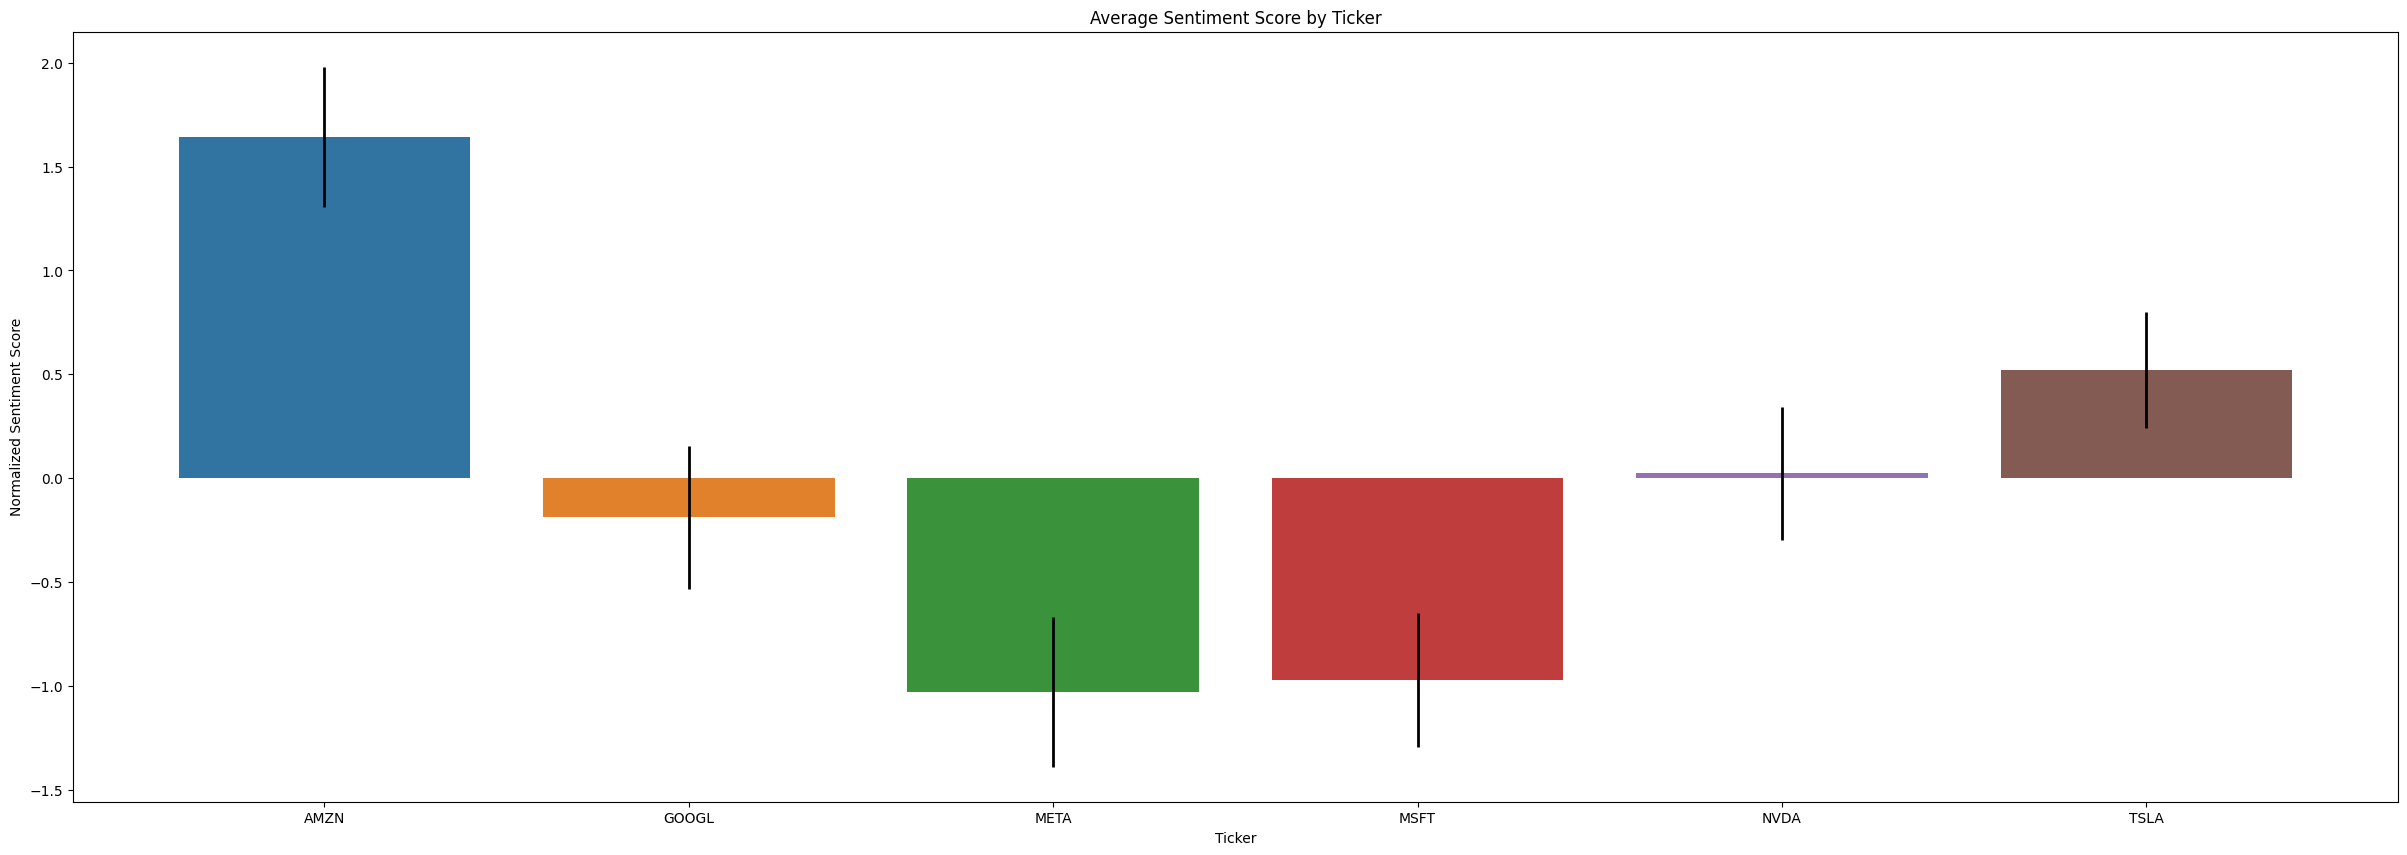

In [5]:
import matplotlib.pyplot as plt
plt.close('all')
#-------------------------------------------------------------------------------------
#Sentiment Over Time Graph
'''def sentiment_over_time(df):    #make it a function for later use
    plt.figure(figsize=(15,15))
    
    # ensure compound is numeric
    df['compound'] = pd.to_numeric(df['compound'], errors='coerce') #coerce means if value cant be converted turn it into NaN instead of throwing error
    
    # ensure date is a proper date
    df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date 
        #this line converts df date column to a datetime object column , makes invalid data = NaN,
            #dt is a datetime accessor, and dt.date converts pandas timestamp (date + time) to python date (only date)
    print("Proper Date: ")
    print(" ")
    print(df.head())
    print(" ")
    # compute mean sentiment per ticker per date
    mean_df = df.groupby(['ticker','date'])['compound'].mean()
        #groups ticker and date,  then selects only compound column and computes mean for every group of ticker+date
        #this is not a dataframe, this is a series with multiindex
    print("Mean_Df Series")
    print(" ")
    print(mean_df)
    print(" ")
    mean_df = mean_df.unstack()
    #acts on last index level and makes it a column, and ticker is the rows, with value = mean_compound
    #now its a dataframe again
    print("Mean_df DataFrame ")
    print(" ")
    print(mean_df.head())
    print(" ")
    mean_df = mean_df.transpose()
    #we need date on x axis, so transpose
    
    
    mean_df.plot(kind="bar")
    plt.title("Sentiment Over Time")
    plt.show

sentiment_over_time(df)'''
#-------------------------------------------------------------------------------------

#Normalized Sentiment Graph
import seaborn as sns
#Z-score = (Value - Mean)  /  Stdev
#https://www.geeksforgeeks.org/data-science/z-score-in-statistics/

def normalized_graph(df):
    # 1. Compute mean + std per ticker
    stats = df.groupby("ticker")["compound"].agg(['mean','std']).reset_index()
    #groups, compound, mean stdev and reset_index() converts it back to dataframe
    print(" ")
    print("this is mean and stdev of each ticker : ", stats)
    print(" ")
    
    # 2. Compute global mean and std for Z-score formula
    global_mean = stats['mean'].mean()     
    global_std  = stats['mean'].std() if stats['mean'].std() != 0 else 1.0   #else 1.0 in case all tickers means are the same, in which case it would divide by 0 => make it 1.0
    
    # 3. Z-score normalize the MEAN ONLY
    stats['zscore'] = (stats['mean'] - global_mean) / global_std
    
    # 4. Use RAW STD for error bars (DO NOT normalize std)
    stats['std_raw'] = stats['std']
    
    # Create a bar chart to show the average sentiment score for each ticker
    
    print(stats)
    plt.figure(figsize=(30, 10))
    sns.barplot(x='ticker', y='zscore', data=stats)
    plt.title('Average Sentiment Score by Ticker')
    plt.xlabel('Ticker')
    plt.ylabel('Normalized Sentiment Score')
    plt.errorbar(
        x=stats['ticker'],
        y=stats['zscore'],
        yerr=stats['std_raw'],
        fmt='none',
        ecolor='black',
        elinewidth=2,       # thickness of the black lines
        capsize=0         # length of the top/bottom caps
    )
    plt.show()
normalized_graph(df)

## HeatMap

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


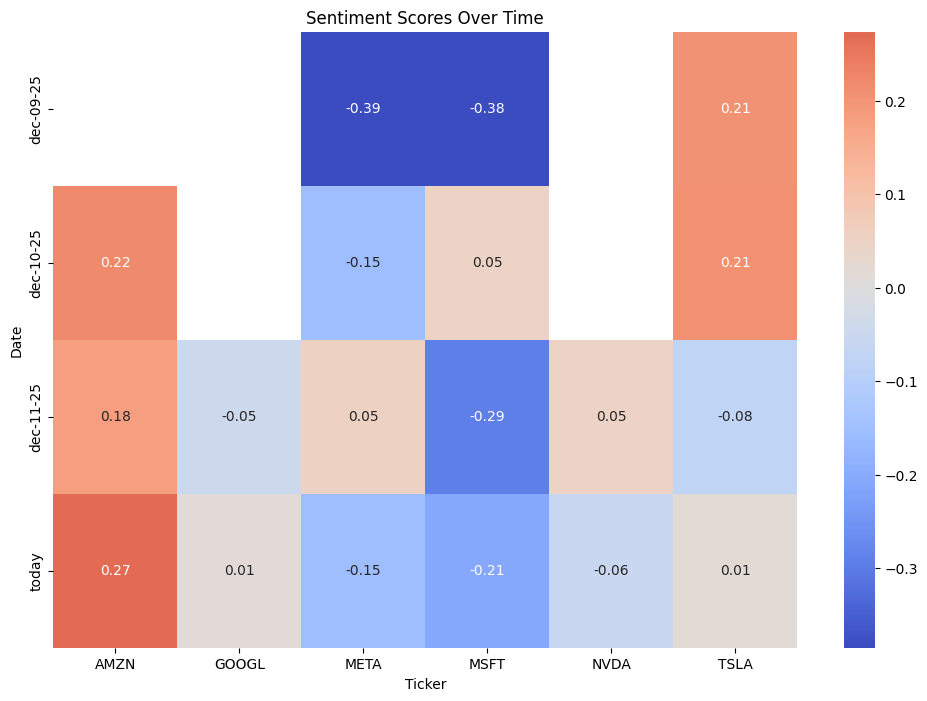

In [6]:
import seaborn as sns
# 1. Normalize the compound values globally
df['normalized_score'] = (df['compound'] - df['compound'].mean()) / df['compound'].std()

# 2. Compute mean normalized score per date and ticker
daily = df.groupby(['date','ticker'], as_index=False)['normalized_score'].mean()
# 3. Pivot into heatmap matrix
pivot_sentiment_df = daily.pivot(index='date', columns='ticker', values='normalized_score')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sentiment_df, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Ticker')
plt.ylabel('Date')
plt.show()



## TreeMap

In [7]:
import plotly.express as px
import pandas as pd
##-----------------------------------------------------------------------------------------------
#Treemap

def treemap_of_normalized_score(df):
    stats = df.groupby("ticker")["compound"].agg(['mean','std']).reset_index()
    global_mean = stats['mean'].mean()     
    global_std  = stats['mean'].std() if stats['mean'].std() != 0 else 1.0   #else 1.0 in case all tickers means are the same, in which case it would divide by 0 => make it 1.0
    
    #Z-score normalize the MEAN ONLY
    stats['zscore'] = (stats['mean'] - global_mean) / global_std
    
    #treemap doesn't take negative values so turn negative into positive but preserving hierarchy
    min_z = stats['zscore'].min()
    stats['size_plot'] = stats['zscore'] - min_z + 1
    
    #make a new dataframe with only the values we need
    plot_df = pd.DataFrame({ 
        'ticker' : stats['ticker'],
        'size_plot' : stats['size_plot'],
        'zscore' :  stats['zscore']          #for label
    })
    
    
    print(plot_df.shape)
    print(plot_df.head())
    
    
    #we used plotly here because doing it in matplotlib will be a pain in the ass
    
    fig = px.treemap(
        plot_df,
        path=[px.Constant("Stocks"), 'ticker'],
        values='size_plot',
    )
    
    fig.update_traces(customdata=plot_df['zscore'])
    fig.update_traces(
        texttemplate="%{label}<br>(%{customdata:.2f})",
        textposition="middle center"
    )
    
    fig.show()

treemap_of_normalized_score(df)

(6, 3)
  ticker  size_plot    zscore
0   AMZN   3.668505  1.641748
1  GOOGL   1.839052 -0.187705
2   META   1.000000 -1.026757
3   MSFT   1.055483 -0.971274
4   NVDA   2.049886  0.023129


## Emotion Distribution

<Figure size 1200x700 with 0 Axes>

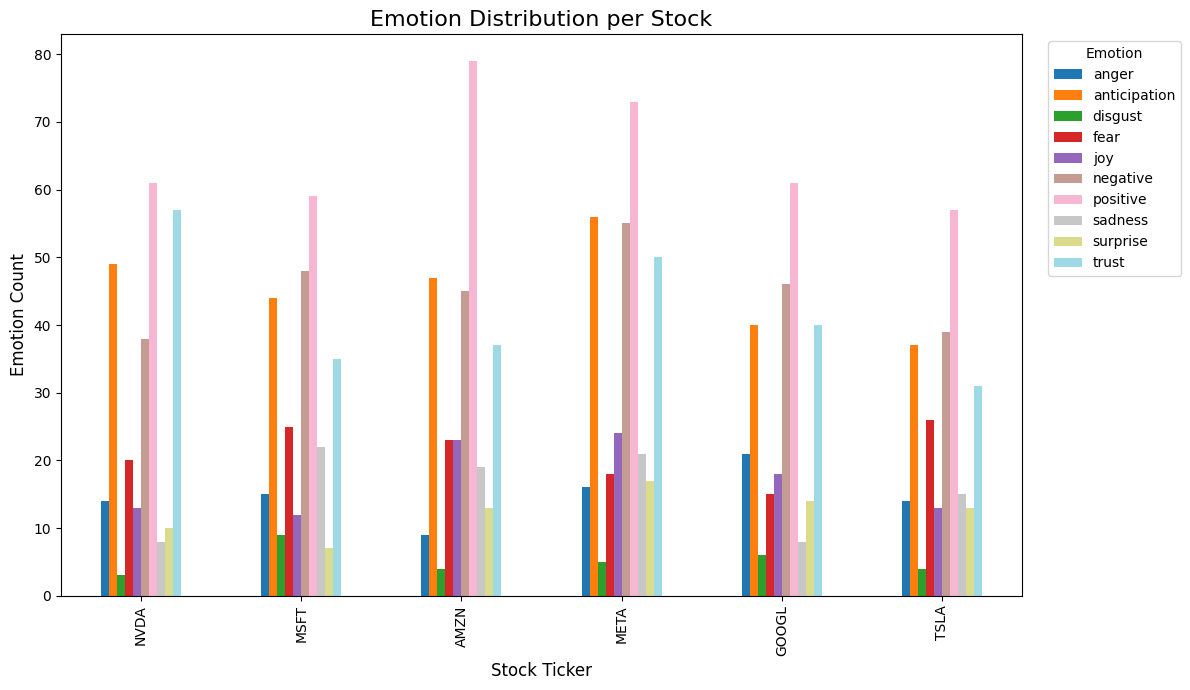

In [8]:
import pandas as pd
import re

lexicon_path = "/kaggle/input/nrc-emoticon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"

emotion_map = {}
with open(lexicon_path, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) != 3:
            continue  # skip invalid lines
        word, emo, val = parts
        if int(val) == 1:
            emotion_map.setdefault(word, []).append(emo)

EMOTIONS = [
    "anger","anticipation","disgust","fear","joy",
    "negative","positive","sadness","surprise","trust"
]

emotion_df = pd.DataFrame()
def emotion_distribution(df):
    # Make sure title is string
    df["title"] = df["title"].astype(str)
    
    # Dictionary: {ticker → {emotion → count}}
    stock_emotions = {}
    
    for ticker in df["ticker"].unique():
        stock_emotions[ticker] = {e: 0 for e in EMOTIONS}
        
        # filter rows for the ticker
        temp = df[df["ticker"] == ticker]["title"]
        
        for title in temp:
            words = re.findall(r"[a-zA-Z']+", title.lower())
            for w in words:
                if w in emotion_map:
                    for emo in emotion_map[w]:
                        stock_emotions[ticker][emo] += 1
    
    # Convert to DataFrame
    global emotion_df
    emotion_df = pd.DataFrame(stock_emotions).T  # tickers become rows
    
    
    plt.figure(figsize=(12, 7))
    
    emotion_df_sorted = emotion_df[EMOTIONS]   # ensure correct order
    
    emotion_df_sorted.plot(
        kind="bar",
        stacked=False,
        figsize=(12, 7),
        colormap="tab20"
    )
    
    plt.title("Emotion Distribution per Stock", fontsize=16)
    plt.xlabel("Stock Ticker", fontsize=12)
    plt.ylabel("Emotion Count", fontsize=12)
    plt.legend(title="Emotion", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
emotion_distribution(df)

## Emotion Strength Comparison

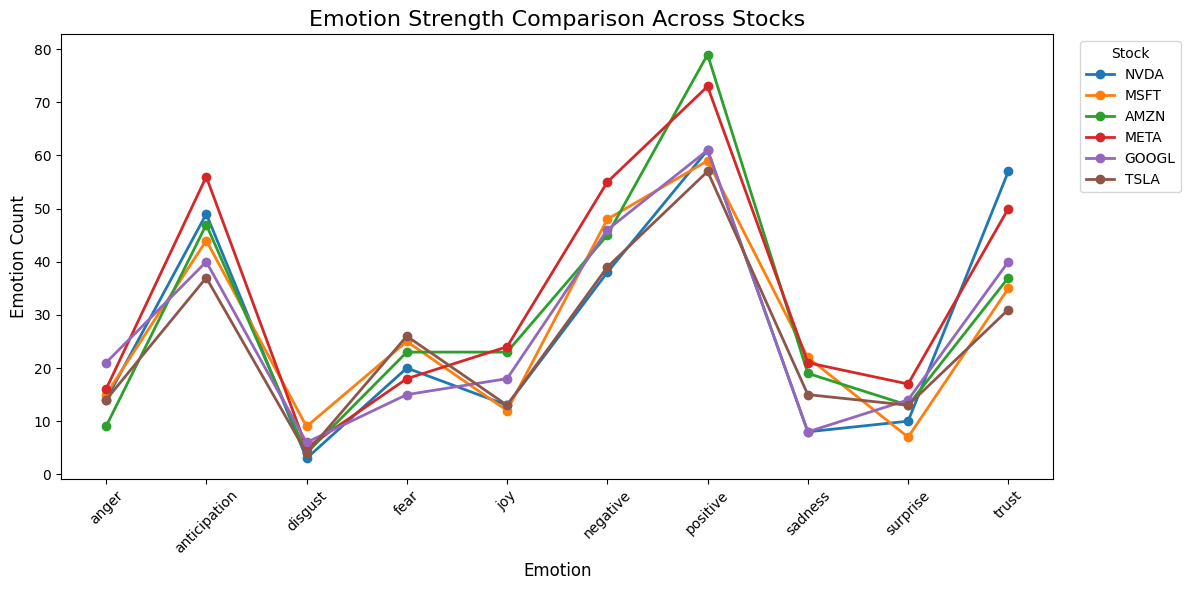

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot one line per stock
for ticker in emotion_df.index:
    plt.plot(EMOTIONS, emotion_df.loc[ticker], marker='o', linewidth=2, label=ticker)

plt.title("Emotion Strength Comparison Across Stocks", fontsize=16)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Emotion Count", fontsize=12)

plt.xticks(rotation=45)
plt.legend(title="Stock", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Radar Chart
## Word Cloud

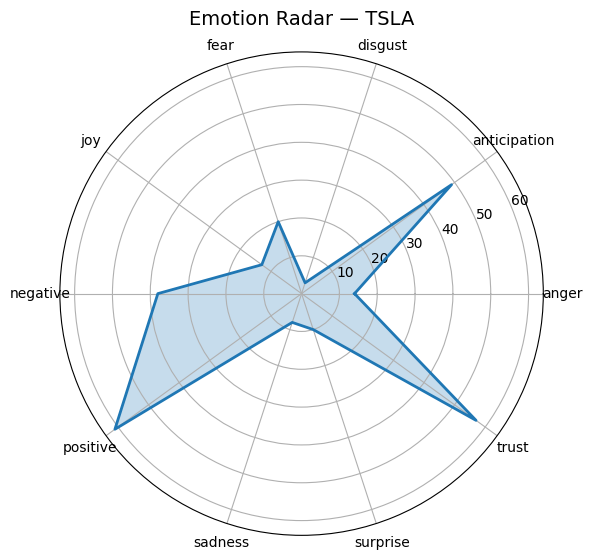

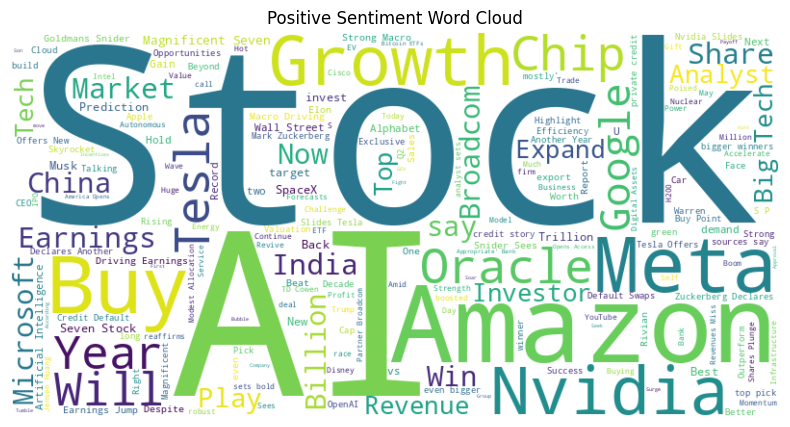

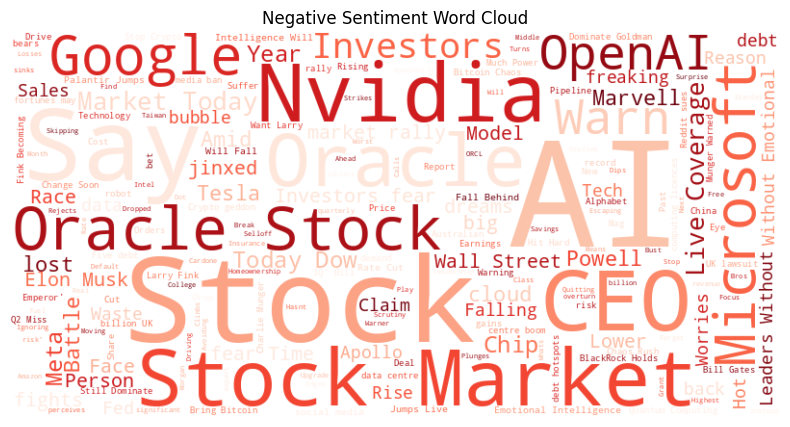

In [10]:
import numpy as np
import matplotlib.pyplot as plt

labels = EMOTIONS
num_vars = len(labels)

# Angles for radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close circle

values = emotion_df.loc['NVDA'].tolist()
values += values[:1]  # close circle

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

plt.title(f"Emotion Radar — {ticker}", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['compound'] > 0]['title'].astype(str))
negative_text = " ".join(df[df['compound'] < 0]['title'].astype(str))

# Positive
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")
plt.show()

# Negative
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")
plt.show()


import re

# Prepare daily emotion counts
daily_emotions = []

for _, row in df.iterrows():
    date = row['date']
    text = row['title'].lower()
    words = re.findall(r"[a-zA-Z']+", text)

    emo_count = {e:0 for e in EMOTIONS}
    for w in words:
        if w in emotion_map:
            for e in emotion_map[w]:
                emo_count[e] += 1

    emo_count['date'] = date
    daily_emotions.append(emo_count)

daily_emotions_df = pd.DataFrame(daily_emotions)
daily_summary = daily_emotions_df.groupby('date').sum()

 
this is mean and stdev of each ticker :                  ticker      mean       std
0              ASX 200  0.069898  0.351608
1           BSE Sensex  0.125522  0.358788
2               CAC 40  0.161471  0.340889
3                  DAX  0.049581  0.345505
4            Dow Jones  0.060811  0.345031
5        Euro Stoxx 50  0.126269  0.370425
6             FTSE 100  0.094320  0.367516
7            Hang Seng  0.147599  0.336553
8             IBOVESPA  0.104685  0.361991
9                KOSPI  0.081615  0.366140
10           NSE Nifty  0.121903  0.338896
11    Nasdaq Composite  0.108031  0.368803
12          Nikkei 225  0.109622  0.374345
13        Russell 2000  0.094444  0.386066
14             S&P 500  0.146938  0.343864
15   S&P/TSX Composite  0.109500  0.398136
16  Shanghai Composite  0.108989  0.358120
17                 TSX  0.075112  0.362352
 
                ticker      mean       std    zscore   std_raw
0              ASX 200  0.069898  0.351608 -1.158939  0.351608
1           

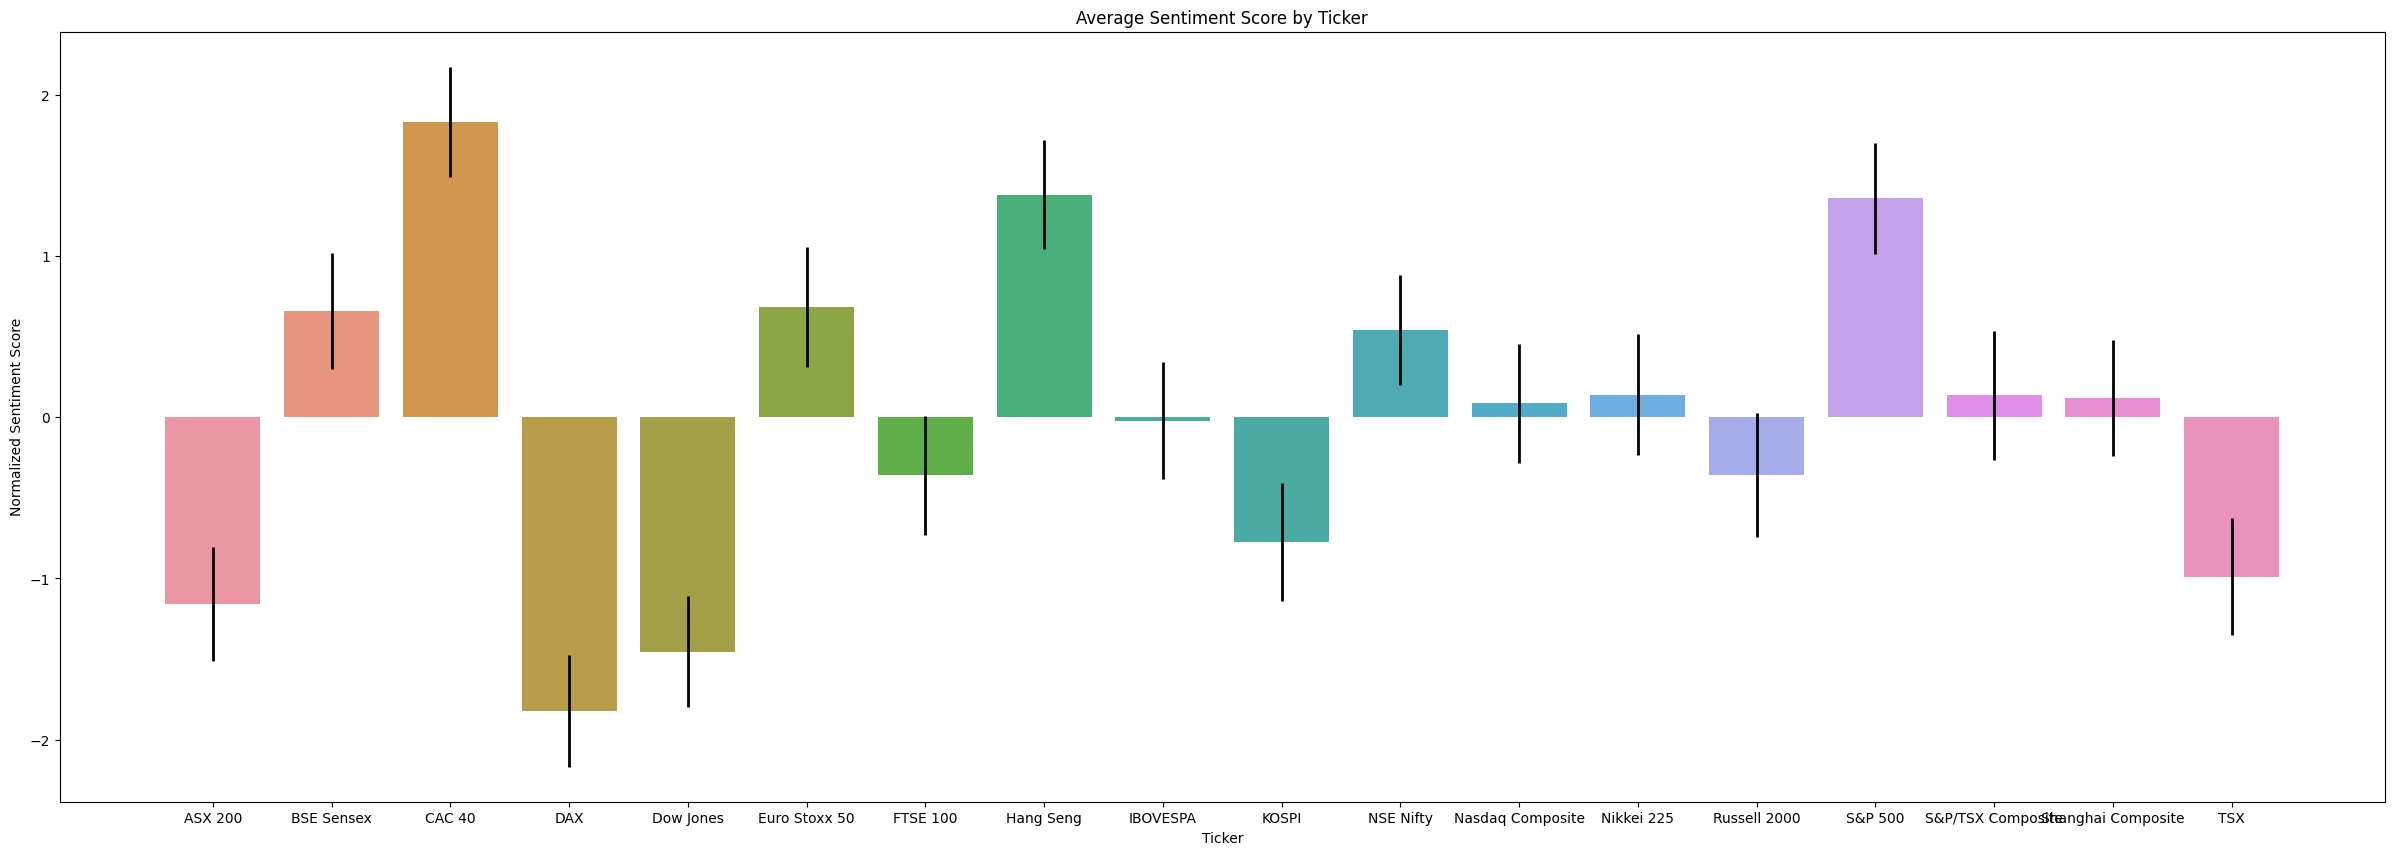

(18, 3)
       ticker  size_plot    zscore
0     ASX 200   1.664173 -1.158939
1  BSE Sensex   3.482510  0.659398
2      CAC 40   4.657697  1.834586
3         DAX   1.000000 -1.823112
4   Dow Jones   1.367102 -1.456010


<Figure size 1200x700 with 0 Axes>

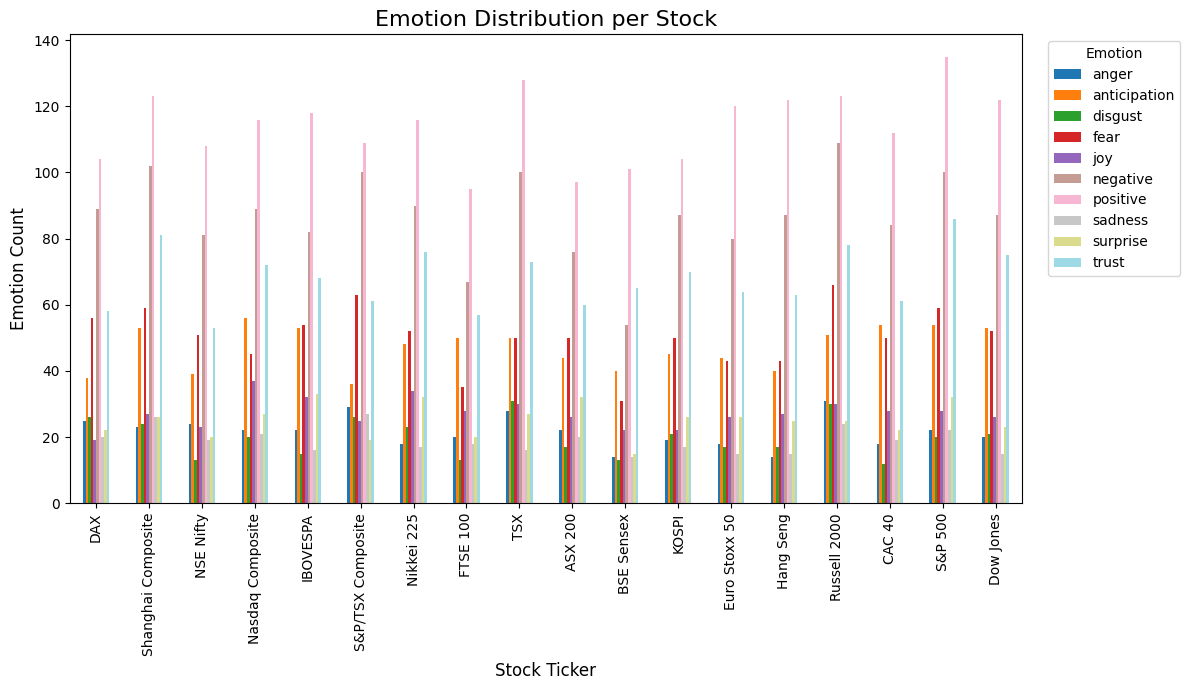

In [11]:
#--------------------------------------------------------------------
#Sentiment Analysis from Database

df = pd.read_csv('/kaggle/input/financial-news-market-events-dataset-2025/financial_news_events.csv')

df = pd.DataFrame({
    'ticker' : df['Market_Index'],
    'date' : df['Date'],
    'title' : df['Headline']
})


df['title'] = df['title'].fillna('').astype(str)


f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

df.head()

normalized_graph(df)
treemap_of_normalized_score(df)
emotion_distribution(df)